In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Setting the path
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 6\25-May-2023 Germany Rent Analysis'

In [4]:
# Importing the final cleaned file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final_cleaned_state.csv'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146820 entries, 0 to 146819
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        146820 non-null  int64  
 1   Unnamed: 0          146820 non-null  int64  
 2   State               146820 non-null  object 
 3   Maintenance_fee     146820 non-null  float64
 4   Heating_type        129593 non-null  object 
 5   TV_offer            129384 non-null  object 
 6   Newly_built         146820 non-null  bool   
 7   Balcony             146820 non-null  bool   
 8   Picture_count       146820 non-null  int64  
 9   Price_trend         145706 non-null  float64
 10  Internet_speed      129035 non-null  float64
 11  Total_Rent          146820 non-null  float64
 12  Year_constructed    146820 non-null  float64
 13  Energy_Source       128539 non-null  object 
 14  Kitchen             146820 non-null  bool   
 15  Cellar              146820 non-nul

## Regression Analysis for all the states in Germany

C:\Users\Bhati\AppData\Local\Temp\ipykernel_10460\3503590265.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Rent'], bins=25) # Shows extreme values


<Axes: xlabel='Total_Rent', ylabel='Density'>

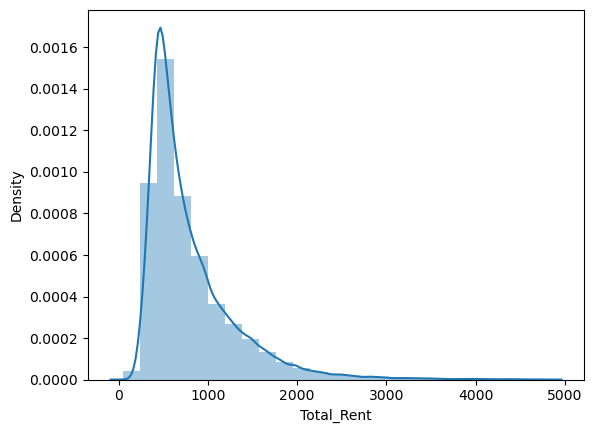

In [6]:
sns.distplot(df['Total_Rent'], bins=25) # Shows extreme values

In [7]:
df['Total_Rent'].mean() # Check the mean

801.627542773464

In [8]:
df['Total_Rent'].median() # Check the median

640.0

In [9]:
df['Total_Rent'].max() # Check the max

4822.0

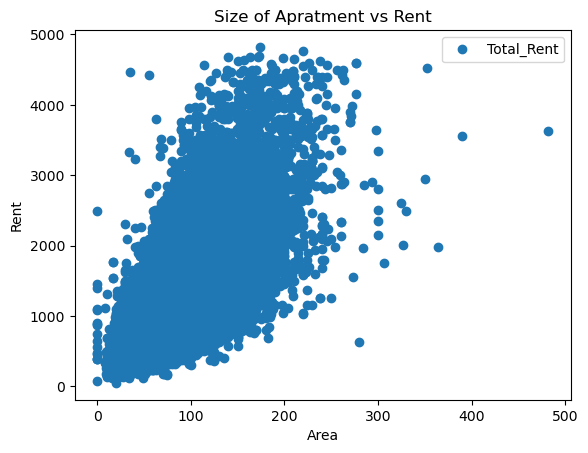

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Area(m2)', y='Total_Rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Size of Apratment vs Rent')  
plt.xlabel('Area')  
plt.ylabel('Rent')  
plt.show()

## H:There is a positive correlation between the area of an apartment and its total rent.

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Area(m2)'].values.reshape(-1,1)
y = df['Total_Rent'].values.reshape(-1,1)

In [12]:
X

array([[ 86.  ],
       [ 70.95],
       [ 70.95],
       ...,
       [126.  ],
       [ 33.  ],
       [ 97.  ]])

In [13]:
y

array([[ 840.],
       [ 766.],
       [ 765.],
       ...,
       [1430.],
       [ 280.],
       [ 830.]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

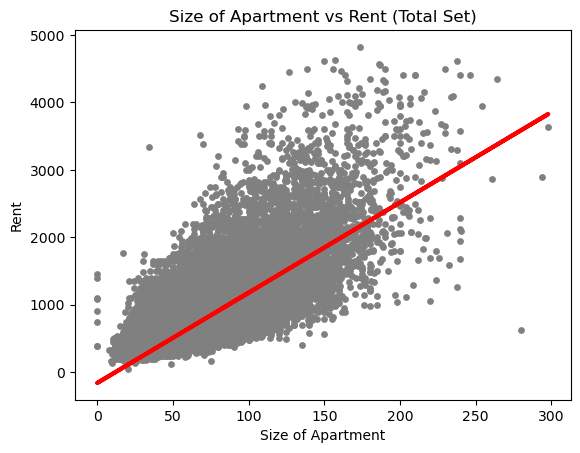

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Size of Apartment vs Rent (Total Set)')
plot_test.xlabel('Size of Apartment')
plot_test.ylabel('Rent')
plot_test.show()

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.37424465]]
Mean squared error:  109295.15045482409
R2 score:  0.5644976973041229


In [21]:
y_predicted

array([[ 964.79583049],
       [1446.26863775],
       [ 663.87532595],
       ...,
       [ 821.82515522],
       [1045.04129837],
       [1172.0966225 ]])

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,980.00,964.795830
1,1890.00,1446.268638
2,400.00,663.875326
3,700.00,643.813959
4,790.00,724.059427
5,2350.00,2030.188159
6,595.00,777.556405
7,570.00,777.556405
8,663.00,964.795830
9,409.86,653.443415


In [23]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.37424465]]
Mean squared error:  111247.54861374653
R2 score:  0.5631440007291744


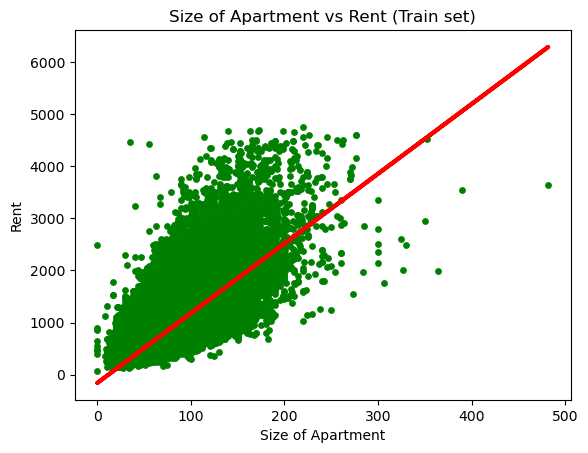

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Size of Apartment vs Rent (Train set)')
plot_test.xlabel('Size of Apartment')
plot_test.ylabel('Rent')
plot_test.show()

The slope value for Germany is 13.37424465, which indicates that the dependent variable changes by approximately 13.37 units for every one unit increase in the independent variable. The mean squared error (MSE) value of 111247.54861374653 indicates that the model’s predictions are not very accurate and there is a large difference between the predicted and actual values. The R2 score of 0.5631440007291744 indicates that the model explains 56.31% of the variance in the dependent variable.

## Regression Analysis for Hamburg (State with highest average rent across Germany)

In [27]:
#subset of state with highest rent
subset = df[df['state'].str.contains('Hamburg')]

C:\Users\Bhati\AppData\Local\Temp\ipykernel_10460\3741933085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['Total_Rent'], bins=25) # Shows extreme values


<Axes: xlabel='Total_Rent', ylabel='Density'>

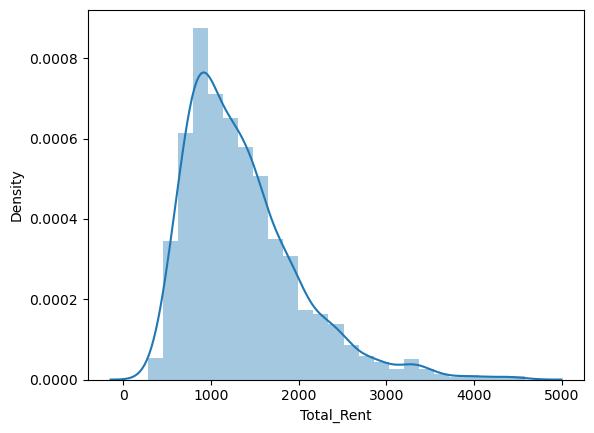

In [28]:
sns.distplot(subset['Total_Rent'], bins=25) # Shows extreme values

In [29]:
subset['Total_Rent'].mean() # Check the mean

1356.0457858455882

In [30]:
subset['Total_Rent'].median() # Check the median

1217.625

In [31]:
subset['Total_Rent'].max() # Check the max

4575.0

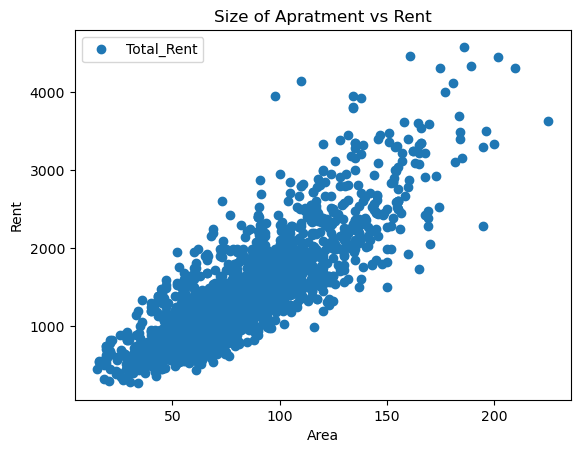

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

subset.plot(x = 'Area(m2)', y='Total_Rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Size of Apratment vs Rent')  
plt.xlabel('Area')  
plt.ylabel('Rent')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = subset['Area(m2)'].values.reshape(-1,1)
y = subset['Total_Rent'].values.reshape(-1,1)

In [34]:
X

array([[ 55.89],
       [120.  ],
       [ 45.  ],
       ...,
       [ 57.77],
       [ 61.  ],
       [ 65.16]])

In [35]:
y

array([[ 760.  ],
       [1544.  ],
       [ 670.  ],
       ...,
       [ 525.  ],
       [ 443.92],
       [ 805.  ]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

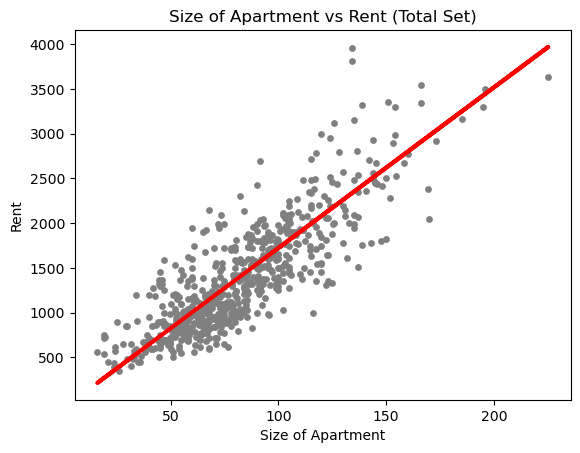

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Size of Apartment vs Rent (Total Set)')
plot_test.xlabel('Size of Apartment')
plot_test.ylabel('Rent')
plot_test.show()

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.95345879]]
Mean squared error:  113601.1680089197
R2 score:  0.7013040391651897


In [43]:
y_predicted

array([[1596.07260825],
       [1926.41624993],
       [2153.347969  ],
       [1370.57716588],
       [1183.14305614],
       [2448.86190064],
       [1370.39763129],
       [1757.65373733],
       [ 975.78060715],
       [1631.97952582],
       [1470.39839674],
       [ 900.55561483],
       [1703.79336097],
       [1308.81726765],
       [1542.21223189],
       [1730.72354915],
       [1057.46884463],
       [1586.91634427],
       [1980.27662629],
       [1506.30531431],
       [2386.02479488],
       [ 728.74101424],
       [1326.41165727],
       [2170.58328944],
       [1508.10066019],
       [1003.60846827],
       [1721.74681976],
       [1326.77072644],
       [1147.23613857],
       [1378.29715316],
       [1466.80770498],
       [ 458.54145949],
       [ 913.84117434],
       [ 877.93425676],
       [1392.4803856 ],
       [1811.51411369],
       [1578.11914946],
       [1919.23486642],
       [ 859.98079797],
       [ 946.51646933],
       [1457.651441  ],
       [1598.765

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2047.00,1596.072608
1,1927.50,1926.416250
2,2190.00,2153.347969
3,1241.00,1370.577166
4,950.00,1183.143056
5,2358.00,2448.861901
6,1425.00,1370.397631
7,1520.00,1757.653737
8,950.00,975.780607
9,1900.00,1631.979526


In [45]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [46]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.95345879]]
Mean squared error:  122613.77872405518
R2 score:  0.72511975633528


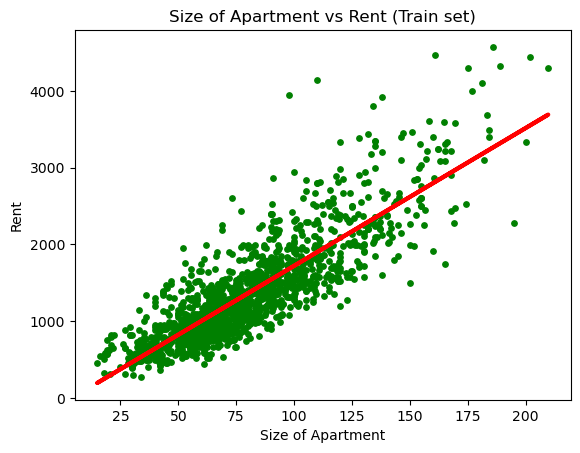

In [48]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Size of Apartment vs Rent (Train set)')
plot_test.xlabel('Size of Apartment')
plot_test.ylabel('Rent')
plot_test.show()

The slope value for Hamburg is 17.95345879, which indicates that the dependent variable changes by approximately 17.95 units for every one unit increase in the independent variable. The mean squared error (MSE) value of 122613.77872405518 indicates that the model’s predictions are not very accurate and there is a large difference between the predicted and actual values. The R2 score of 0.72511975633528 indicates that the model explains 72.51% of the variance in the dependent variable.

## Regression Analysis for Sachsen_Anhalt (state with lowest average rent across Germany)

In [49]:
# changing state name with '-' to'_' as hyphen can be considered as minus while using dot notation commands
df.state = df.state.str.replace('-', '_')

In [50]:
Subset2 = df[df['state'].str.contains('Sachsen_Anhalt')]

C:\Users\Bhati\AppData\Local\Temp\ipykernel_10460\3397154685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Subset2['Total_Rent'], bins=25) # Shows extreme values


<Axes: xlabel='Total_Rent', ylabel='Density'>

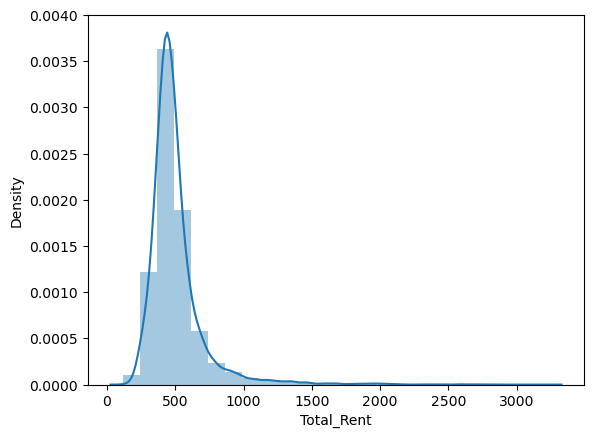

In [51]:
sns.distplot(Subset2['Total_Rent'], bins=25) # Shows extreme values

In [52]:
Subset2['Total_Rent'].mean() # Check the mean

501.58551886041704

In [53]:
Subset2['Total_Rent'].median() # Check the median

460.0

In [54]:
Subset2['Total_Rent'].max() # Check the max

3234.0

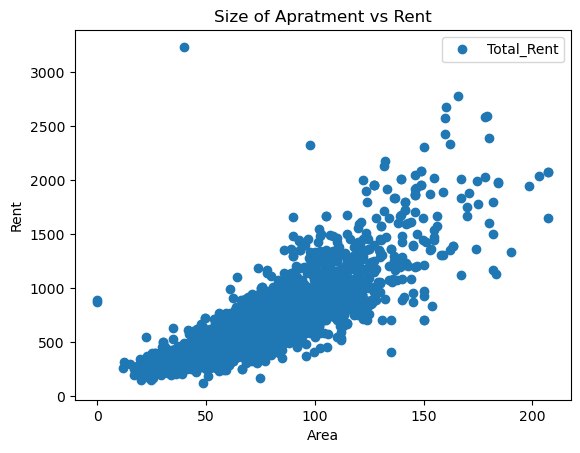

In [55]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

Subset2.plot(x = 'Area(m2)', y='Total_Rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Size of Apratment vs Rent')  
plt.xlabel('Area')  
plt.ylabel('Rent')  
plt.show()

In [56]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = Subset2['Area(m2)'].values.reshape(-1,1)
y = Subset2['Total_Rent'].values.reshape(-1,1)

In [57]:
X

array([[56.66],
       [65.06],
       [55.97],
       ...,
       [32.7 ],
       [60.8 ],
       [54.6 ]])

In [58]:
y

array([[447.62],
       [442.42],
       [437.  ],
       ...,
       [269.85],
       [385.  ],
       [383.  ]])

In [59]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [61]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

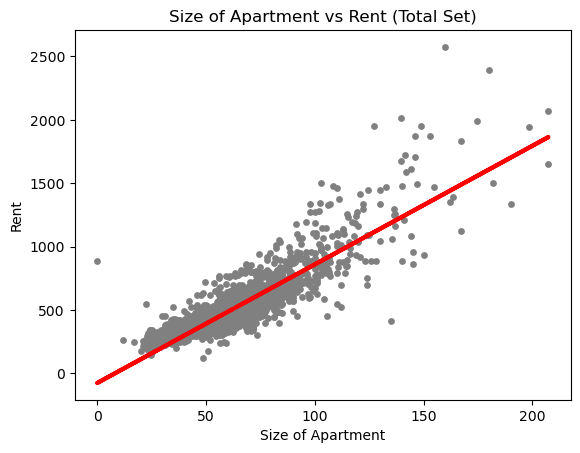

In [63]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Size of Apartment vs Rent (Total Set)')
plot_test.xlabel('Size of Apartment')
plot_test.ylabel('Rent')
plot_test.show()

In [64]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [65]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.35023181]]
Mean squared error:  9346.385281456856
R2 score:  0.7434559021257443


In [66]:
y_predicted

array([[ 527.9948772 ],
       [ 532.01547688],
       [1249.17825705],
       ...,
       [ 487.04086185],
       [ 231.2185194 ],
       [ 498.16763771]])

In [67]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,513.00,527.994877
1,481.14,532.015477
2,1720.00,1249.178257
3,424.00,478.064639
4,591.00,614.765028
5,530.00,579.514654
6,460.00,477.503625
7,295.00,136.500671
8,476.40,523.413264
9,1085.00,934.823463


In [68]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [69]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.35023181]]
Mean squared error:  12536.704029999315
R2 score:  0.7163571921168449


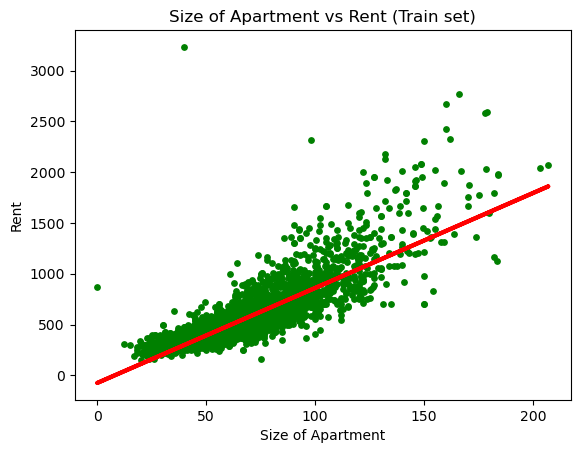

In [71]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Size of Apartment vs Rent (Train set)')
plot_test.xlabel('Size of Apartment')
plot_test.ylabel('Rent')
plot_test.show()

The slope value for Sachsen_Anahalt is 9.35023181, which indicates that the dependent variable changes by approximately 9.35 units for every one unit increase in the independent variable. The mean squared error (MSE) value of 12536.704029999315 indicates that the model’s predictions are not very accurate and there is a large difference between the predicted and actual values. The R2 score of 0.7163571921168449 indicates that the model explains 71.64% of the variance in the dependent variable.

From all three regression analysis (i.e for Germany, Hamburg(highest avg rent), Saqchsen_Anhalt(lowest avg rent) it is clear that there are other factors that are not accounted for by the model and may be affecting the dependent variable. That means we need a model with more dimensionality to be able to accurately predict rent.